In [2]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from math import log
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib.collections import LineCollection

print("Current working directory:", os.getcwd())

Current working directory: z:\Codes\TFG


In [6]:
# cargamos reultados del barrido aletarorio
barr_random = np.load("data/barrido_LCEs_random.npy")
print(barr_random.shape)

(5000, 3)


# Análisis de LCEs vs $\sigma$

## Para un $x_0$ dado.
Hacemos un barrido de intensidades de ruido para el $x_0$ utilzado hasta ahora

In [ ]:
# PRUEBA DE TIEMPO DE UN WOLF
from src.stoc_system import StochasticSystem

model = StochasticSystem(r, a, x0, total_time = 5000, dt = 5000/1e5, sigma =[0.04, 0.04, 0.04, 0.04])
t, x = model.euler_maruyama()
lces = model.estimate_LCE1_Wolf(
            x, evol_time=500,
            min_separation=180,
            max_replacements=500,
            start_indices= list([int(1e5 //4 ), int(1e5 // 2), int(1e5 // (4/3) )])
        )
print(lces[0])  

0.14898070482682668


## Para un $x_0$ distinto en cada iteración
Ahora pruebo con el $x_0$ random en cada iteración

In [ ]:
### NO EJECUTAR, TARDA MUCHO (~3h)
## se pueden cargar los resultados de un CSV ya hecho

from src.functions import barrido_LCEs_random
barr_random = barrido_LCEs_random(
    total_time=5000,
    N_points=1e5,
    max_iters=5000
)

z:\Codes\TFG\src\stoc_system.py:156: RuntimeWarning: divide by zero encountered in log
  log_sum += np.log(dist_final / dist_init)
c:\Users\kikek\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1882: RuntimeWarning: invalid value encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe', where=where)


In [8]:
# guardamos los resultados porque son pesados
np.save('data/barrido_LCEs_random.npy', barr_random)

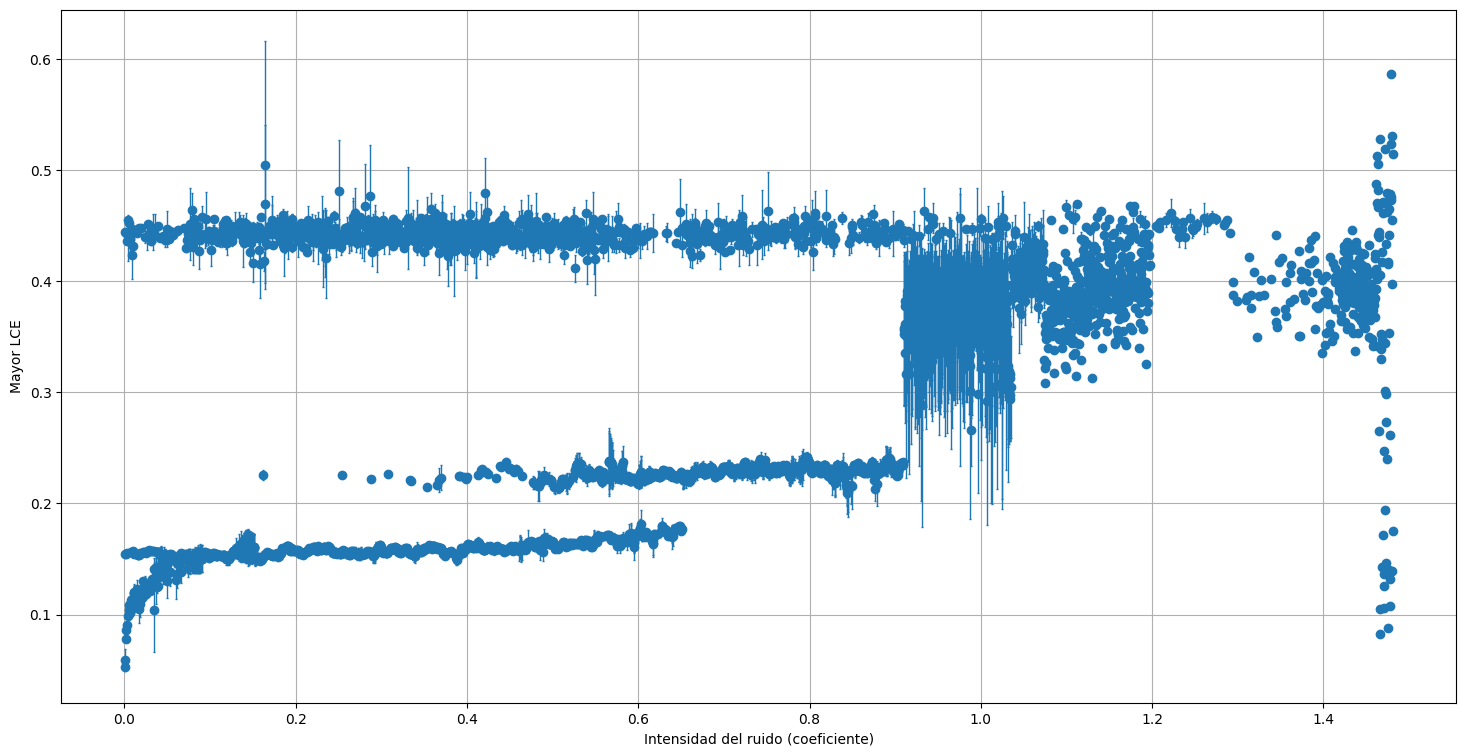

In [9]:
# creamos una gráfica para verlo
fig_barridos, ax_barridos = plt.subplots(figsize = (18,9))
plt.errorbar(
    x = barr_random[:, 0], y = barr_random[:, 1], yerr = barr_random[:, 2], fmt = 'o', elinewidth = 1, capsize = 1 
)

plt.xlabel('Intensidad del ruido (coeficiente)')
plt.ylabel('Mayor LCE')                                                                           
plt.grid()
plt.show()

## Diagrama de bifurcaciones

<>:43: SyntaxWarning: invalid escape sequence '\s'
<>:44: SyntaxWarning: invalid escape sequence '\l'
<>:43: SyntaxWarning: invalid escape sequence '\s'
<>:44: SyntaxWarning: invalid escape sequence '\l'
C:\Users\kikek\AppData\Local\Temp\ipykernel_114464\1463847563.py:43: SyntaxWarning: invalid escape sequence '\s'
  ax.set_xlabel('$\sigma$', fontsize=16, weight='semibold')
C:\Users\kikek\AppData\Local\Temp\ipykernel_114464\1463847563.py:44: SyntaxWarning: invalid escape sequence '\l'
  ax.set_ylabel('$\lambda_1$', fontsize=16, weight='semibold')


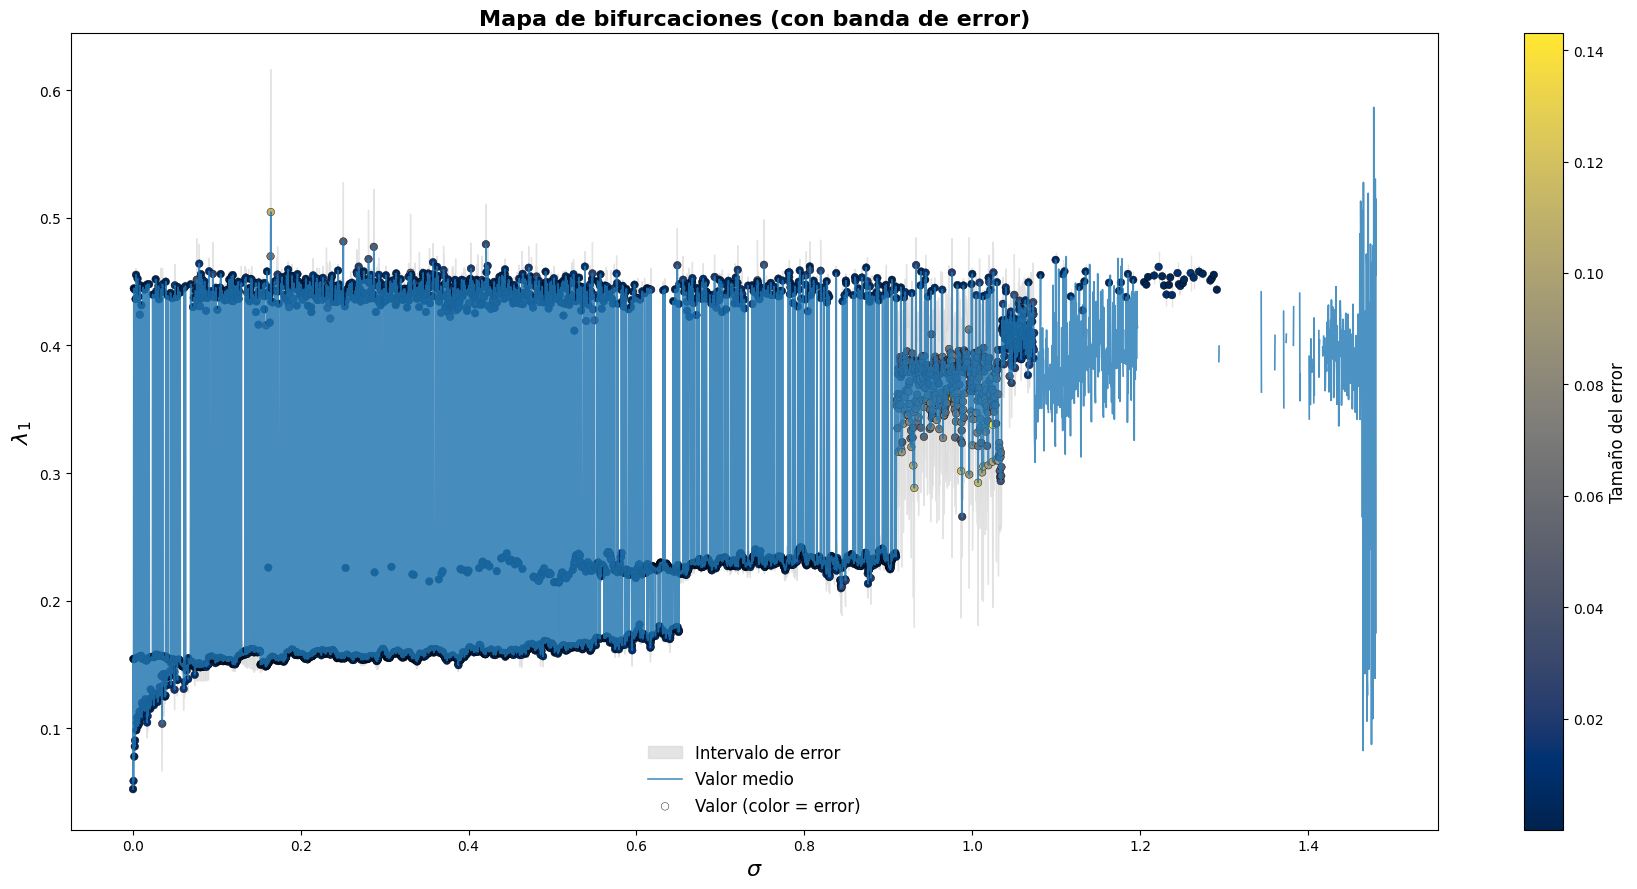

In [14]:

r   = barr_random[:, 0]
x   = barr_random[:, 1]
err = barr_random[:, 2]

fig, ax = plt.subplots(figsize=(18,9))

# 1) Banda sombreada de incertidumbre
ax.fill_between(
    r,
    x - err,
    x + err,
    color='lightgray',
    alpha=0.6,
    label='Intervalo de error'
)

# 2) Línea conectando los valores centrales
ax.plot(
    r,
    x,
    '-',
    linewidth=1.2,
    alpha=0.8,
    label='Valor medio'
)

# 3) Scatter coloreado según magnitud del error
sc = ax.scatter(
    r,
    x,
    c=err,
    cmap='cividis',
    s=30,
    edgecolor='k',
    linewidth=0.3,
    label='Valor (color = error)'
)
cbar = fig.colorbar(sc, ax=ax)
cbar.ax.set_ylabel('Tamaño del error', fontsize=12)

# 4) Estética
ax.set_title('Mapa de bifurcaciones (con banda de error)', fontsize=16, weight='bold')
ax.set_xlabel('$\sigma$', fontsize=16, weight='semibold')
ax.set_ylabel('$\lambda_1$', fontsize=16, weight='semibold')
ax.grid(False)
ax.legend(frameon=False, fontsize=12)

fig.tight_layout()
plt.show()

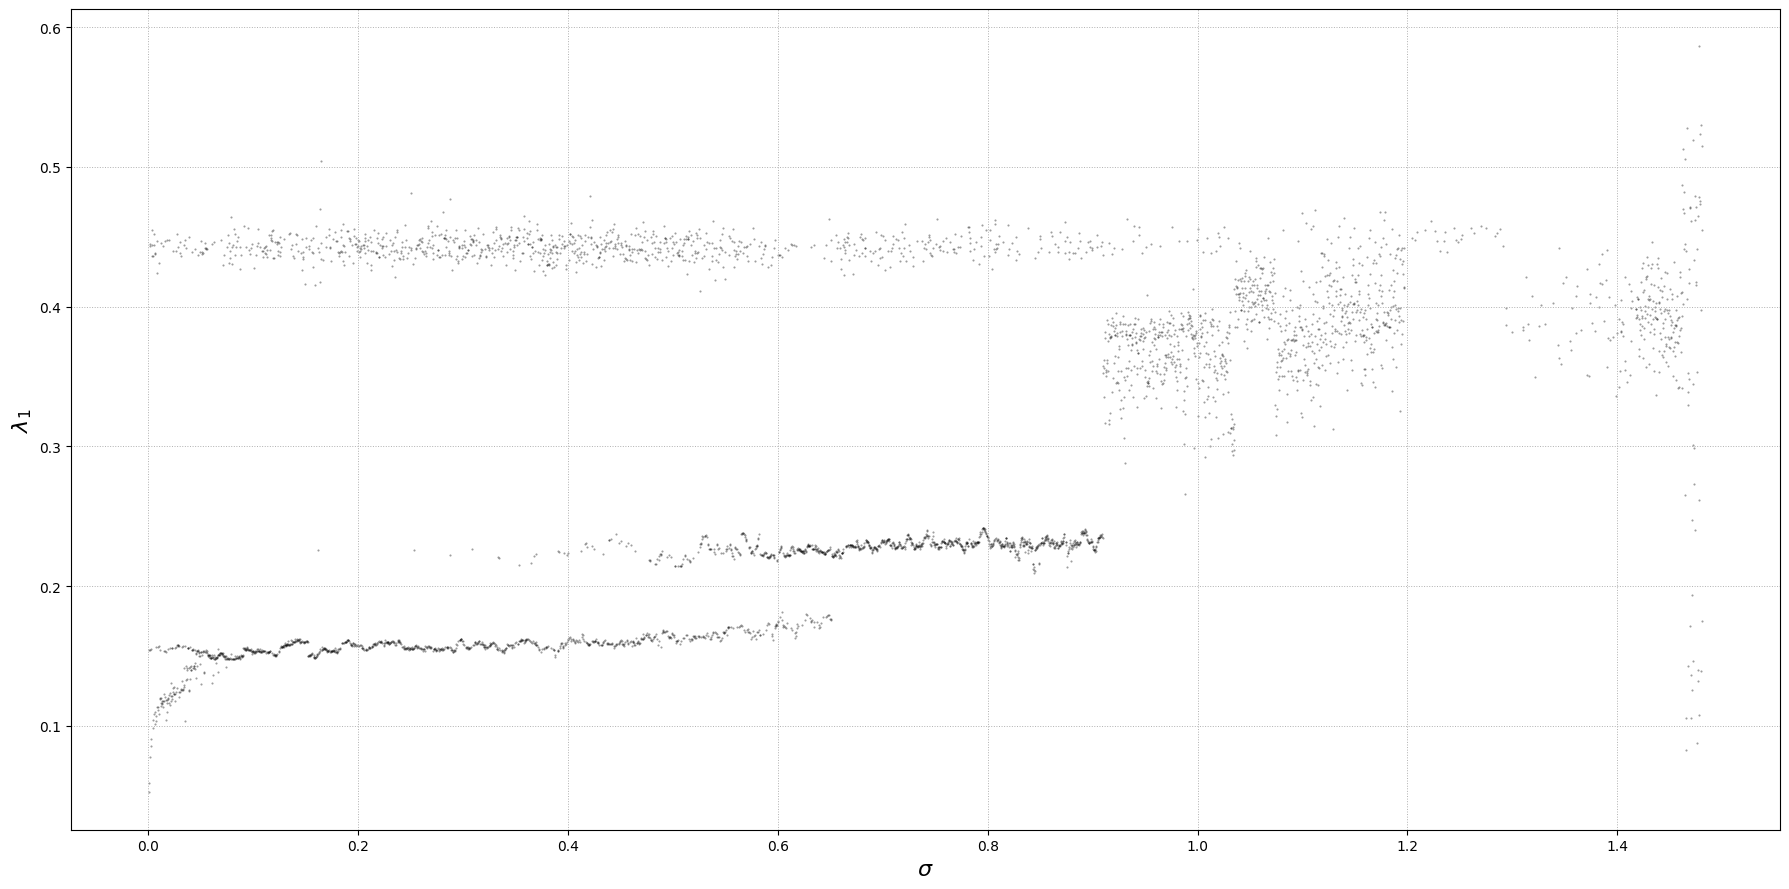

In [18]:
# extraemos parámetros
sigma = barr_random[:, 0]
lces = barr_random[:, 1]
delta = barr_random[:, 2]

fig, ax = plt.subplots(figsize=(18, 9))

# scatter estilo bifurcación: muchos puntos chiquititos y algo transparentes
ax.scatter(
    sigma, lces,
    s=1,                    # tamaño de punto muy pequeño
    alpha=0.4,                # transparencia para ver densidades
    marker='.',               # marcador puntiagudo
    color='black'             # clásico negro
)



ax.set_xlabel(r'$\sigma$', fontsize=16)
ax.set_ylabel(r'$\lambda_1$', fontsize=16)

ax.grid(True, linestyle=':', linewidth=.7)

fig.tight_layout()
plt.show()

Puedo introducir más puntos dentro del rango del error para verlo mejor

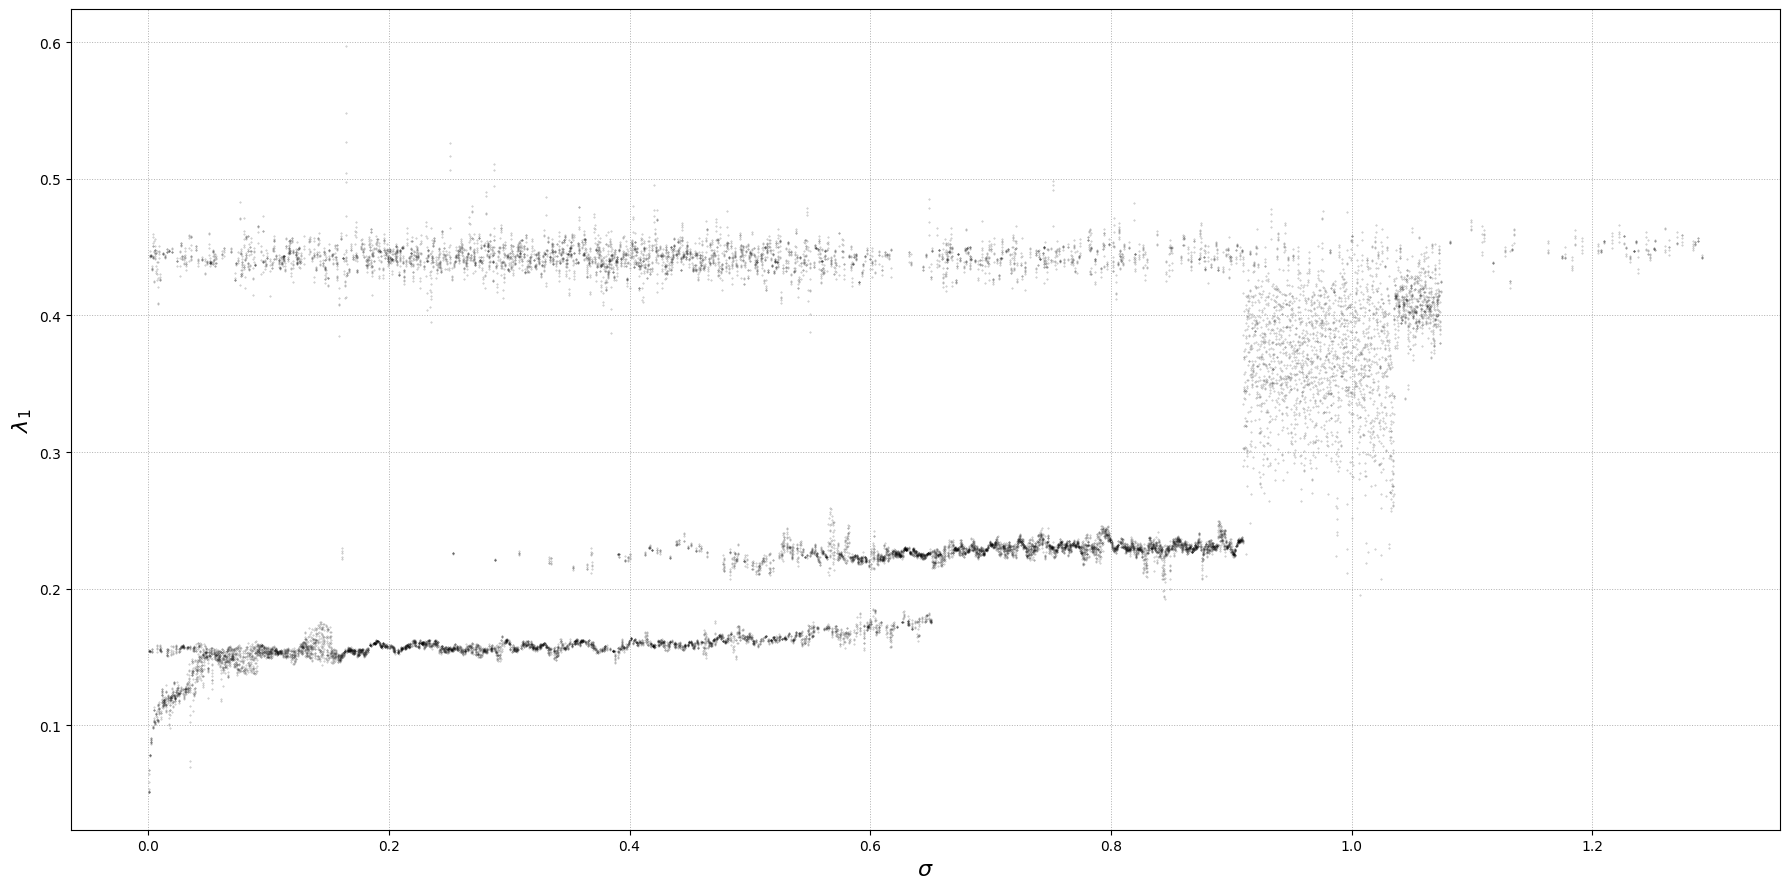

In [ ]:
# simulamos dispersión dentro del error para dar densidad
n_rep = 5  # cuántos puntos extra por valor de sigma
sigma_rep = np.repeat(sigma, n_rep)

# distribuimos uniformemente en [lces-delta, lces+delta]
lces_jitter = np.repeat(lces, n_rep) + (np.random.rand(len(sigma_rep)) * 2 - 1) * np.repeat(delta, n_rep)

fig, ax = plt.subplots(figsize=(18, 9))

# scatter estilo bifurcación: muchos puntos chiquititos y algo transparentes
ax.scatter(
    sigma_rep, lces_jitter,
    s=0.5,                    # tamaño de punto muy pequeño
    alpha=0.3,                # transparencia para ver densidades
    marker='.',               # marcador puntiagudo
    color='black'             # clásico negro
)


ax.set_xlabel(r'$\sigma$', fontsize=16)
ax.set_ylabel(r'$\lambda_1$', fontsize=16)

ax.grid(True, linestyle=':', linewidth=.7)

fig.tight_layout()
plt.show()

# Análisis de Extinciones vs $\sigma$
Podemos hacer lo mismo ahora para las extinciones